In [23]:
pip install statsmodels
# pip install seaborn
# pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 34.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 13.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# READ

In [25]:
from dotenv import load_dotenv
import os
import s3fs
import pyarrow.dataset as ds
from datetime import datetime

load_dotenv()
API_KEY = os.getenv("OPENWEATHER_API_KEY")
ACCESS_KEY = os.getenv("LAKEFS_ACCESS_KEY")
SECRET_KEY = os.getenv("LAKEFS_SECRET_KEY")
lakefs_endpoint = os.getenv("LAKEFS_ENDPOINT", "http://lakefs-dev:8000")

fs = s3fs.S3FileSystem(
    key=ACCESS_KEY,
    secret=SECRET_KEY,
    client_kwargs={'endpoint_url': lakefs_endpoint}
)


# path = "pollution-data/main/pollution.parquet/"
path = "weather-data/main/weather.parquet/"
dataset = ds.dataset(
    path,
    format="parquet",
    partitioning="hive",
    filesystem=fs
)


filtered = dataset.to_table(
    filter=(
        (ds.field("year") == 2025) &
        (ds.field("month") == 5) &
        (
         (ds.field("day") == 16) |
         (ds.field("day") == 17) |
        (ds.field("day") == 18)
        )
        # (ds.field("hour") == 12)
    )
)


# final_df = filtered.to_pandas()
# final_df.info()

# df_filtered = filtered.to_pandas()
# df_filtered

# pollution_df_filtered = filtered.to_pandas()
# pollution_df_filtered
weather_df_filtered = filtered.to_pandas()
weather_df_filtered


,timestamp,minute,localtime,province,district,district_id,lat,lon,weather_main,weather_description,...,main.pressure,main.humidity,visibility,wind.speed,wind.deg,flow_timestamp,year,month,day,hour
0,2025-05-16 10:33:19.513071,33,2025-05-16 17:33:19.513071+07:00,Krabi,Nuea Khlong,8108,8.0747,99.0036,Clouds,overcast clouds,...,1007,82,9605.0,3.02,178,2025-05-16 10:30:00.313669,2025,5,16,10
1,2025-05-16 10:33:19.491993,33,2025-05-16 17:33:19.491993+07:00,Krabi,Lam Thap,8107,8.0717,99.2917,Clouds,overcast clouds,...,1007,91,10000.0,1.52,178,2025-05-16 10:30:00.313669,2025,5,16,10
2,2025-05-16 10:33:19.504338,33,2025-05-16 17:33:19.504338+07:00,Krabi,Plai Phraya,8106,8.5333,98.8628,Clouds,overcast clouds,...,1007,93,4868.0,0.93,301,2025-05-16 10:30:00.313669,2025,5,16,10
3,2025-05-16 10:33:19.524300,33,2025-05-16 17:33:19.524300+07:00,Krabi,Khao Phanom,8102,8.2647,99.0492,Rain,light rain,...,1007,94,10000.0,1.70,182,2025-05-16 10:30:00.313669,2025,5,16,10
4,2025-05-16 10:33:19.508774,33,2025-05-16 17:33:19.508774+07:00,Krabi,Ao Luek,8105,8.3775,98.7217,Rain,light rain,...,1007,88,6167.0,1.06,195,2025-05-16 10:30:00.313669,2025,5,16,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260414,2025-05-18 09:51:34.564273,51,2025-05-18 16:51:34.564273+07:00,Mae Hong Son,Khun Yuam,5802,18.8394,97.9514,Clouds,overcast clouds,...,1009,87,10000.0,0.42,246,2025-05-18 09:44:59.685095,2025,5,18,9
260415,2025-05-18 09:51:34.564111,51,2025-05-18 16:51:34.564111+07:00,Mae Hong Son,Pai,5803,19.3586,98.4400,Clouds,overcast clouds,...,1008,73,10000.0,0.82,277,2025-05-18 09:44:59.685095,2025,5,18,9
260416,2025-05-18 09:51:34.563853,51,2025-05-18 16:51:34.563853+07:00,Mae Hong Son,Mae Sariang,5804,18.1598,97.9325,Clouds,overcast clouds,...,1008,64,10000.0,0.99,268,2025-05-18 09:44:59.685095,2025,5,18,9
260417,2025-05-18 09:51:34.564301,51,2025-05-18 16:51:34.564301+07:00,Mae Hong Son,Mae La Noi,5805,18.3844,97.9369,Clouds,overcast clouds,...,1008,69,10000.0,0.77,277,2025-05-18 09:44:59.685095,2025,5,18,9


In [26]:
# merge
import pandas as pd
weather_pollution_df = pd.merge(
    pollution_df_filtered,
    weather_df_filtered,
    on=['flow_timestamp', 'district_id', 'lat', 'lon'],
    suffixes=('_pollution', '_weather')
)

weather_pollution_df['province'] = weather_pollution_df['province_pollution']
weather_pollution_df['district'] = weather_pollution_df['district_pollution']

weather_pollution_df['year'] = weather_pollution_df['year_pollution']
weather_pollution_df['month'] = weather_pollution_df['month_pollution']
weather_pollution_df['day'] = weather_pollution_df['day_pollution']
weather_pollution_df['hour'] = weather_pollution_df['hour_pollution']


### main pollution
weather_pollution_df['timestamp'] = weather_pollution_df['timestamp_pollution']
weather_pollution_df['localtime'] = weather_pollution_df['localtime_pollution']
weather_pollution_df['minute'] = weather_pollution_df['minute_pollution']

weather_pollution_df.drop(columns=[
    'province_pollution', 'province_weather',
    'district_pollution', 'district_weather',
    'timestamp_pollution', 'timestamp_weather',
    'minute_pollution', 'minute_weather',
    'localtime_pollution', 'localtime_weather',
    'year_pollution', 'year_weather',
    'month_pollution', 'month_weather',
    'day_pollution', 'day_weather',
    'hour_pollution', 'hour_weather'
], inplace=True)


weather_pollution_df

,district_id,lat,lon,main.aqi,components_co,components_no,components_no2,components_o3,components_so2,components_pm2_5,...,wind.deg,province,district,year,month,day,hour,timestamp,localtime,minute
0,8108,8.0747,99.0036,2,257.44,0.00,0.94,79.18,0.14,12.92,...,178,Krabi,Nuea Khlong,2025,5,16,10,2025-05-16 10:45:01.067003,2025-05-16 17:45:01.067003+07:00,45
1,8107,8.0717,99.2917,2,266.39,0.00,1.16,79.48,0.22,13.37,...,178,Krabi,Lam Thap,2025,5,16,10,2025-05-16 10:45:01.049242,2025-05-16 17:45:01.049242+07:00,45
2,8106,8.5333,98.8628,2,284.02,0.00,1.64,76.96,0.22,11.30,...,301,Krabi,Plai Phraya,2025,5,16,10,2025-05-16 10:45:00.885766,2025-05-16 17:45:00.885766+07:00,45
3,8102,8.2647,99.0492,2,268.83,0.00,0.84,83.16,0.12,13.03,...,182,Krabi,Khao Phanom,2025,5,16,10,2025-05-16 10:45:01.055475,2025-05-16 17:45:01.055475+07:00,45
4,8105,8.3775,98.7217,2,234.54,0.00,0.68,80.67,0.07,12.03,...,195,Krabi,Ao Luek,2025,5,16,10,2025-05-16 10:45:01.056543,2025-05-16 17:45:01.056543+07:00,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256226,5802,18.8394,97.9514,1,195.77,0.02,1.04,35.18,0.21,5.96,...,246,Mae Hong Son,Khun Yuam,2025,5,18,9,2025-05-18 09:33:24.909839,2025-05-18 16:33:24.909839+07:00,33
256227,5803,19.3586,98.4400,1,160.92,0.10,0.74,30.68,0.27,2.73,...,277,Mae Hong Son,Pai,2025,5,18,9,2025-05-18 09:33:24.908107,2025-05-18 16:33:24.908107+07:00,33
256228,5804,18.1594,97.9336,1,221.16,0.08,1.36,43.21,0.35,7.47,...,268,Mae Hong Son,Mae Sariang,2025,5,18,9,2025-05-18 09:33:24.913289,2025-05-18 16:33:24.913289+07:00,33
256229,5805,18.3844,97.9369,1,241.23,0.07,1.80,42.05,0.39,8.88,...,277,Mae Hong Son,Mae La Noi,2025,5,18,9,2025-05-18 09:33:24.911613,2025-05-18 16:33:24.911613+07:00,33


In [27]:
schema = dataset.schema
print(schema)
# print(final_df.select_dtypes(include=['object']).columns)

timestamp: timestamp[ns]
minute: int64
localtime: timestamp[ns, tz=Asia/Bangkok]
province: string
district: string
district_id: int64
lat: double
lon: double
weather_main: string
weather_description: string
main.temp: double
main.temp_min: double
main.temp_max: double
main.feels_like: double
main.pressure: int64
main.humidity: int64
visibility: int64
wind.speed: double
wind.deg: int64
flow_timestamp: timestamp[us]
year: int32
month: int32
day: int32
hour: int32
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 3135


In [28]:
final_df = weather_pollution_df
final_df = final_df.select_dtypes(include=['float64', 'int64'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256231 entries, 0 to 256230
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   district_id       256231 non-null  int64  
 1   lat               256231 non-null  float64
 2   lon               256231 non-null  float64
 3   main.aqi          256231 non-null  int64  
 4   components_co     256231 non-null  float64
 5   components_no     256231 non-null  float64
 6   components_no2    256231 non-null  float64
 7   components_o3     256231 non-null  float64
 8   components_so2    256231 non-null  float64
 9   components_pm2_5  256231 non-null  float64
 10  components_pm10   256231 non-null  float64
 11  components_nh3    256231 non-null  float64
 12  main.temp         256231 non-null  float64
 13  main.temp_min     256231 non-null  float64
 14  main.temp_max     256231 non-null  float64
 15  main.feels_like   256231 non-null  float64
 16  main.pressure     25

# ML

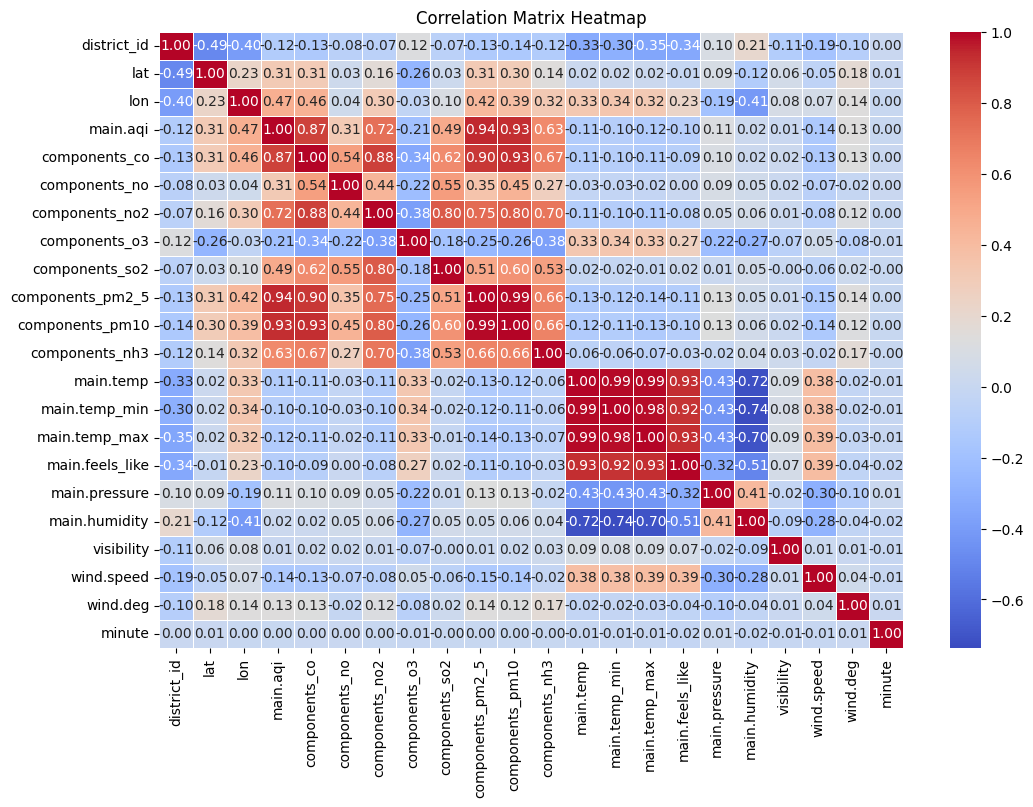

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ คำนวณ Correlation Matrix
corr_matrix = final_df.corr()

# ✅ วาด Heatmap สำหรับ Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [30]:
target_variable = 'components_pm2_5'

# ✅ กำหนด features
features = final_df.drop(columns=[target_variable])

# ✅ ลบคอลัมน์ที่มี NaN
features = features.dropna(axis=1)

# ✅ ตรวจสอบ NaN
print(features.isnull().sum())

# ✅ คำนวณ mutual information
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(features, final_df[target_variable])

# ✅ แสดงผลลัพธ์
mi_scores = pd.DataFrame(mutual_info, index=features.columns, columns=["Mutual Information"])
print(mi_scores.sort_values(by="Mutual Information", ascending=False))

district_id        0
lat                0
lon                0
main.aqi           0
components_co      0
components_no      0
components_no2     0
components_o3      0
components_so2     0
components_pm10    0
components_nh3     0
main.temp          0
main.temp_min      0
main.temp_max      0
main.feels_like    0
main.pressure      0
main.humidity      0
wind.speed         0
wind.deg           0
minute             0
dtype: int64
                 Mutual Information
components_co              7.350227
components_pm10            5.996409
components_o3              5.840937
components_no2             4.742770
components_nh3             4.349170
district_id                3.660218
lat                        3.600643
lon                        3.482101
components_so2             3.385307
components_no              2.161132
wind.speed                 1.954254
wind.deg                   1.952558
main.aqi                   1.270702
main.temp_max              1.120148
main.temp_min              

In [31]:
from sklearn.feature_selection import mutual_info_regression

# คำนวณ Mutual Information
mutual_info = mutual_info_regression(features, final_df[target_variable])

# สร้าง DataFrame แสดงผลลัพธ์
mi_scores = pd.DataFrame(mutual_info, index=features.columns, columns=["Mutual Information"])

# แสดงผลลัพธ์
print(mi_scores.sort_values(by="Mutual Information", ascending=False))

                 Mutual Information
components_co              7.351675
components_pm10            5.995241
components_o3              5.843157
components_no2             4.745157
components_nh3             4.348056
district_id                3.660756
lat                        3.602495
lon                        3.481009
components_so2             3.385221
components_no              2.163742
wind.speed                 1.953527
wind.deg                   1.951998
main.aqi                   1.271670
main.temp_max              1.120549
main.temp_min              1.112013
main.temp                  1.073383
main.feels_like            0.992744
main.humidity              0.773639
main.pressure              0.398753
minute                     0.121501


In [32]:
from sklearn.feature_selection import SelectKBest

# เลือกฟีเจอร์ที่มีความสัมพันธ์สูงสุด K ตัวแปร
k_best = SelectKBest(mutual_info_regression, k=9)
X_new = k_best.fit_transform(features, final_df[target_variable])

# ดูคอลัมน์ที่ถูกเลือก
selected_features = features.columns[k_best.get_support()]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['district_id', 'lat', 'lon', 'components_co', 'components_no2',
       'components_o3', 'components_so2', 'components_pm10', 'components_nh3'],
      dtype='object')


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ✅ แบ่งข้อมูลเป็น Training และ Test set
X = features  # ฟีเจอร์ที่ใช้ในการทำนาย
y = final_df[target_variable]  # ตัวแปรเป้าหมาย

# แบ่งข้อมูลเป็น 80% Training และ 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ สร้างโมเดล Linear Regression
model = LinearRegression()

# ✅ ฝึกโมเดล
model.fit(X_train, y_train)

# ✅ ทำนายผลจาก Test Set
y_pred = model.predict(X_test)

# ✅ ประเมินผลโมเดล
mse = mean_squared_error(y_test, y_pred)  # คำนวณ MSE
r2 = r2_score(y_test, y_pred)  # คำนวณ R-squared

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.077543395133622
R-squared: 0.9941211234790923


In [34]:
# ✅ ลบแถวที่มีค่า NaN ในทั้ง X และ y
X_clean = X.dropna()
y_clean = y[X_clean.index]  # ให้ index ของ y ตรงกับ X ที่ไม่มี NaN

print("Cleaned X shape: ", X_clean.shape)
print("Cleaned y shape: ", y_clean.shape)

Cleaned X shape:  (256231, 20)
Cleaned y shape:  (256231,)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# ✅ แบ่งข้อมูล Train และ Test
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# ✅ สร้างโมเดล Linear Regression
regressor = LinearRegression()

# ✅ เทรนโมเดล
regressor.fit(X_train, y_train)

# ✅ พยากรณ์ข้อมูล
y_pred = regressor.predict(X_test)

# ✅ แสดง Coefficients
print("Model Coefficients:")
print(regressor.coef_)

Model Coefficients:
[ 2.30257384e-04  5.36872801e-02  3.01319097e-01  8.17192399e-01
  1.57332494e-03 -4.10158148e-01 -1.64905391e-01  5.28514208e-03
 -5.43442738e-01  9.06135933e-01  1.33361794e-01  1.92750013e-01
  4.07093019e-02 -2.42556627e-01  3.77037493e-03  7.14833742e-02
  8.97470421e-03  9.38437939e-03  1.24577180e-04 -7.40111555e-05]


                 Coefficient
components_pm10     0.906136
main.aqi            0.817192
lon                 0.301319
main.temp           0.192750
components_nh3      0.133362
main.pressure       0.071483
lat                 0.053687
main.temp_min       0.040709
wind.speed          0.009384
main.humidity       0.008975
components_o3       0.005285
main.feels_like     0.003770
components_co       0.001573
district_id         0.000230
wind.deg            0.000125
minute             -0.000074
components_no2     -0.164905
main.temp_max      -0.242557
components_no      -0.410158
components_so2     -0.543443


/tmp/ipykernel_59/2039268495.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients['Coefficient'], palette='coolwarm')


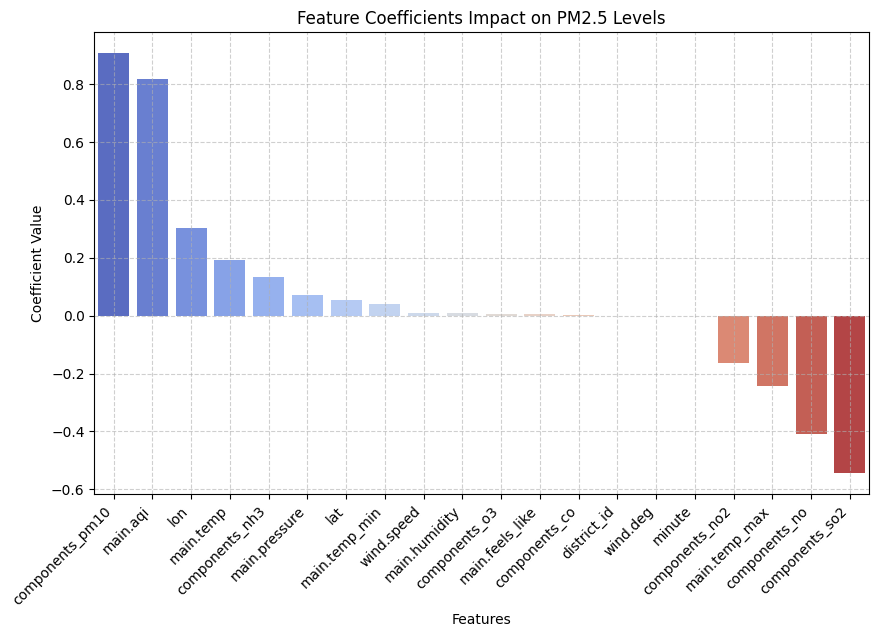

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ สร้าง DataFrame สำหรับแสดงผลลัพธ์ของ Coefficients
coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

# ✅ เรียงลำดับจากค่ามากไปน้อย
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# ✅ แสดงผล
print(coefficients)

# ✅ Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'], palette='coolwarm')
plt.title('Feature Coefficients Impact on PM2.5 Levels')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [38]:
# แยกข้อมูลเป็น X (ฟีเจอร์) และ y (ตัวแปรที่ทำนาย)
#X = features  # ฟีเจอร์ที่ใช้ในการทำนาย
#y = final_df[target_variable]  # ตัวแปร PM2.5 ที่เราต้องการทำนาย
X = final_df[['components_pm10', 'main.temp', 'wind.speed', 'main.humidity', 'main.pressure' ]]  # ฟีเจอร์
y = final_df['components_pm2_5']  # ตัวแปรที่เราต้องการทำนาย (PM2.5)

from sklearn.model_selection import train_test_split

# แบ่งข้อมูลออกเป็น training set และ test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
# สร้างโมเดล Linear Regression
regressor = LinearRegression()
# ฝึกโมเดลกับข้อมูล training set
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
# ทำนายค่าฝุ่น PM2.5 ในข้อมูลทดสอบ
y_pred = regressor.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error, r2_score

# คำนวณ R² (ค่า R-squared) และ Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R² (Coefficient of Determination): 0.9776
Mean Absolute Error (MAE): 1.4326


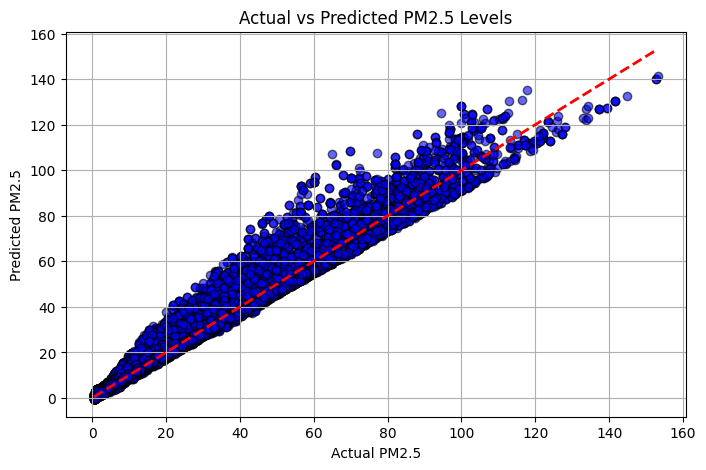

In [41]:
import matplotlib.pyplot as plt

# Visualization: Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted PM2.5 Levels')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.grid(True)
plt.show()

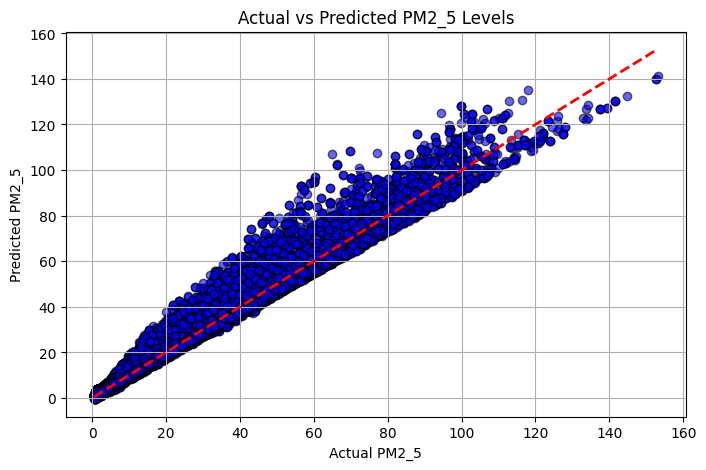

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ✅ 6. Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted PM2_5 Levels')
plt.xlabel('Actual PM2_5')
plt.ylabel('Predicted PM2_5')
plt.grid(True)
plt.show()